In [2]:
import numpy as np
import os, pickle
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from wordcloud import WordCloud
from sklearn.linear_model import LogisticRegression

In [3]:
# load emoji list
fullfile = os.path.expanduser("~/Dropbox/insight/Emoji/"+'mySmileys.p')
with open(fullfile, 'rb') as fp:
    emoji_list = pickle.load(fp)
print(emoji_list)
print(len(emoji_list))

['😀', '😁', '😂', '🤣', '😃', '😄', '😅', '😆', '😉', '😊', '😋', '😎', '😍', '😘', '😗', '😙', '😚', '☺️', '🙂', '🤗', '🤔', '😐', '😑', '😶', '🙄', '😏', '😣', '😥', '😮', '🤐', '😯', '😪', '😫', '😴', '😌', '😛', '😜', '😝', '🤤', '😒', '😓', '😔', '😕', '🙃', '🤑', '😲', '☹️', '🙁', '😖', '😞', '😟', '😤', '😢', '😭', '😦', '😧', '😨', '😩', '😬', '😰', '😱', '😳', '😵', '😡', '😠', '😷', '🤒', '🤕', '🤢', '🤧', '😇', '🤠', '🤡', '🤥', '🤓']
75


In [4]:
fullfile = os.path.expanduser("~/Dropbox/insight_datadir/"+'clf_2step_75way_1002_mindf6.p')
# fullfile = os.path.expanduser("~/Dropbox/insight_datadir/"+'clf_2step_8way_1002.p')
with open(fullfile, 'rb') as fp:
    vectorizer,clf = pickle.load(fp)

In [ ]:
# fullfile = os.path.expanduser("~/Dropbox/insight/Twitter/"+'tweet_data_75x_unique_singles_target1d.p')
# #'tweet_data_75x_unique_singles_target1d.p')
# with open(fullfile, 'rb') as fp:
#     D = pickle.load(fp)

In [5]:
X = clf.coef_
X.shape

(75, 15207)

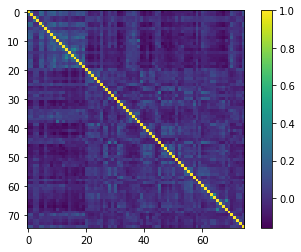

In [6]:
cm = np.corrcoef(X)

plt.imshow(cm,interpolation='nearest')
plt.colorbar()
plt.show()

## try the prediction probs

In [7]:
# load data
class tweet_data:
    pass

# D = tweet_data()
# D.raw_data = rawdata
# D.data = data
# D.raw_target = raw_target
# D.filenames = filenames
# D.numTweets = Len
# D.target_1d = target_1d
# # D.target_arr = target_arr
# D.target_names = target_names

fullfile = os.path.expanduser("~/Dropbox/insight/Twitter/"+'tweet_data_75x_unique_singles_target1d.p')
#'tweet_data_75x_unique_singles_target1d.p')
with open(fullfile, 'rb') as fp:
    D = pickle.load(fp)

In [43]:
# select subset
target_names = ['😀','😎','😶','😛','😩','😱','😷','🤓']
numEmojis = len(target_names)
print(numEmojis)

IX = [emoji_list.index(n) for n in target_names]
Len = D.numTweets

data = []
target = []
for i in range(numEmojis):
    ix = IX[i]
    i_end = (np.cumsum(Len)[ix])
    i_start = i_end - Len[ix]
    data_chunk = D.data[i_start:i_end]
    target_chunk = D.target_1d[i_start:i_end]
    data.extend(data_chunk)
    target.extend(target_chunk)
target_1d = np.array(target, dtype=int)  

8


In [11]:
# this is like a struct
class tweet_train:
    pass

In [9]:
T = tweet_train()
T.target_names = target_names
T.data = data
#T.filenames = D.filenames
T.target = target_1d

# if 0:
    

SyntaxError: unexpected EOF while parsing (<ipython-input-9-839ebf44d939>, line 12)

In [12]:
    # load all data
    target_names = emoji_list
    T = tweet_train()
    T.target_names = target_names
    T.data = D.data
    T.filenames = D.filenames
    T.target = D.target_1d#target

In [13]:
# Split the dataset in training and test set:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    T.data, T.target, test_size=0.2,random_state=0)

In [75]:
XV_test = vectorizer.transform(X_test)

preds = clf.predict_proba(XV_test)
preds.shape

(61778, 75)

In [74]:
XV = vectorizer.transform(T.data)

preds = clf.predict_proba(XV)
preds.shape


(308887, 75)

In [73]:
# convert y_test into same shape as preds
IX = [emoji_list.index(n) for n in target_names]

truths = np.zeros((len(y_test), len(target_names)))
for i in range(len(y_test)):
    j = IX.index(y_test[i])
    truths[i,j] = 1
truths.shape
    

(61778, 75)

In [84]:
np.histogram(preds2[:])

(array([2316206,    4278,    2243,     898,     421,     289,     160,
             61,      56,      13]),
 array([0.        , 0.07170415, 0.14340829, 0.21511244, 0.28681659,
        0.35852074, 0.43022488, 0.50192903, 0.57363318, 0.64533733,
        0.71704147]))

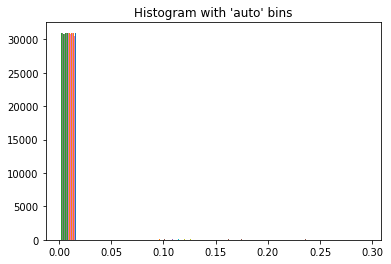

In [85]:
plt.hist(preds2[:], bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

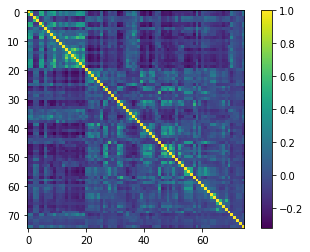

In [16]:
cm = np.corrcoef(np.transpose(preds))

fig, ax = plt.subplots()
plt.imshow(cm,interpolation='nearest')
plt.colorbar()
plt.show()
fig.savefig('AllX_75_predprob_Corr.png', bbox_inches='tight')

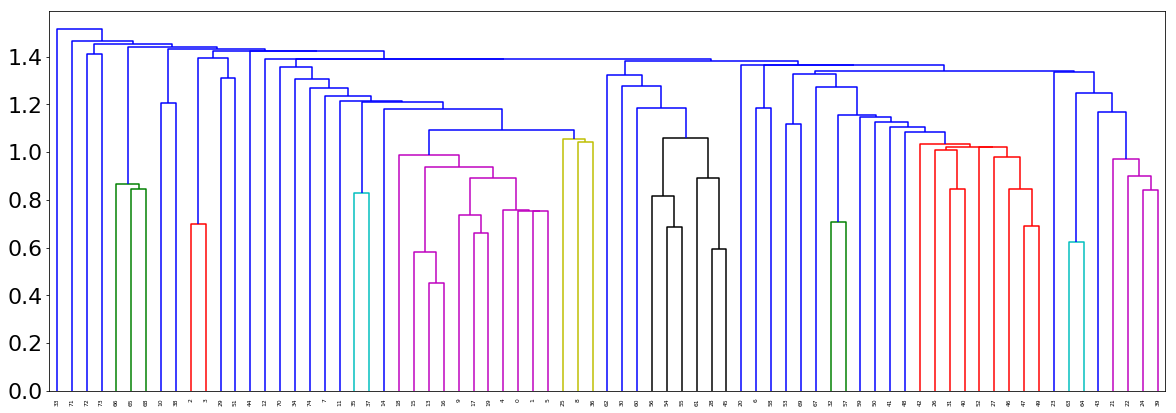

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list


linked = linkage(cm, 'single')

labelList = emoji_list

fig = plt.figure(figsize=(20, 7))  
dg = dendrogram(linked,  
            orientation='top',
#             labels=labelList,
            distance_sort='descending')
plt.show()
# fig.savefig('AllX_75_predprob_Hier.png', bbox_inches='tight')

In [21]:
dg.keys()

dict_keys(['icoord', 'dcoord', 'ivl', 'leaves', 'color_list'])

In [44]:
print(dg['color_list'])
print(emoji_list[0:6])
print(dg['leaves'])

['b', 'g', 'g', 'b', 'r', 'b', 'b', 'c', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'y', 'y', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'k', 'k', 'k', 'k', 'k', 'b', 'b', 'b', 'b', 'b', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'c', 'm', 'm', 'm', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']
['😀', '😁', '😂', '🤣', '😃', '😄']
[33, 71, 72, 73, 66, 65, 68, 10, 38, 2, 3, 29, 51, 44, 12, 70, 34, 74, 7, 11, 35, 37, 14, 18, 15, 13, 16, 9, 17, 19, 4, 0, 1, 5, 25, 8, 36, 62, 30, 60, 56, 54, 55, 61, 28, 45, 20, 6, 58, 53, 69, 67, 32, 57, 59, 50, 41, 48, 42, 26, 31, 40, 52, 27, 46, 47, 49, 23, 63, 64, 43, 21, 22, 24, 39]


In [42]:
clist = dg['color_list']
IX = [i for i, e in enumerate(clist) if e == 'm']
print(IX)
for i in IX:
#     print(i)
     print(dg['leaves'][i])

[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 55, 56, 57]
38
2
3
29
51
44
12
70
34
74
50
41
48


In [32]:
dg['leaves'][2]
    

72

In [113]:
# the above is just to visualize and decide nclus... = 34
# https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

In [131]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=25, affinity='euclidean', linkage='ward')  
gIX = cluster.fit_predict(cm)

array([ 8,  8,  0,  0,  8,  8,  6,  4,  4, 16, 14,  4,  2, 19,  2, 19, 19,
       16,  8, 16,  6,  5,  5,  9,  5,  4,  3, 12,  1,  0,  1,  3, 18, 10,
        2, 17,  4, 17, 14,  5,  3, 12,  3,  5, 10,  1, 12, 12,  3, 12,  9,
        0, 12, 11,  7,  7,  7, 18,  6,  9,  1,  1,  1, 15, 15, 13, 13,  3,
       13, 11,  2, 10, 10, 10,  4])

In [132]:
nClus = gIX.max()+1
G = [[] for x in range(nClus)]

for i in range(len(gIX)):
    id = gIX[i]
    G[id] = G[id] + [i]#.extend(i)
    
#     print(emoji_list[gIX[i]],end=' ')
print(G)

[[12, 14, 34, 70], [26, 31, 40, 42, 48, 67], [44, 71], [7, 11, 74], [23, 50, 59], [21, 22, 24, 39, 43], [6, 20, 58], [54, 55, 56], [0, 1, 4, 5, 18], [30, 60, 62], [8, 25, 36], [72, 73], [27, 41, 46, 47, 49, 52], [65, 66, 68], [10, 38], [63, 64], [9, 17, 19], [35, 37], [32, 57], [13, 15, 16], [2, 3], [28, 45, 61], [29, 51], [53, 69], [33]]


In [85]:
def get_group(i_index,G):
    for i in range(nClus):
        a = G[i]
        if i_index in a:
            i_group = i #print(i)

    this_group = G[i_group] 
    return this_group  

get_group(18,G)

[0, 1, 4, 5, 18]

In [133]:
for i in range(nClus):
    for j in range(len(G[i])):
        print(emoji_list[G[i][j]],end=' ')
    print("")
    

😍 😗 😌 😇 
😣 😪 😓 😕 😖 🤕 
🤑 🤠 
😆 😎 🤓 
😶 😟 😰 
😐 😑 🙄 😒 🙃 
😅 🤔 😬 
😦 😧 😨 
😀 😁 😃 😄 🙂 
😯 😱 😵 
😉 😏 😜 
🤡 🤥 
😥 😔 ☹️ 🙁 😞 😢 
😷 🤒 🤢 
😋 🤤 
😡 😠 
😊 ☺️ 🤗 
😛 😝 
😫 😩 
😘 😙 😚 
😂 🤣 
😮 😲 😳 
🤐 😤 
😭 🤧 
😴 


In [111]:
def group_accuracy(preds, truths, n, G):
    best_n = np.argsort(preds, axis=1)[:,-n:] # only for n=1 
#     best_1 = np.argsort(preds, axis=1)[:,-1:] #
    ts = np.argmax(truths, axis=1)
    successes = 0
    for i in range(ts.shape[0]): 
        this_group = get_group(ts[i],G) 
    
        if len(set(list(best_n[i,:])) & set(list(this_group)))>0: #best_1[i,:] in this_group: # this becomes if ts[i] in group[i,:]
            successes += 1
    return float(successes)/ts.shape[0]

In [81]:
ts = np.argmax(truths, axis=1)
ts.shape


(61778,)

In [134]:
group_accuracy(preds, truths, 1, G)

0.19911619022953156

In [77]:
#both preds and truths are same shape m by n (m is number of predictions and n is number of classes)
def top_n_accuracy(preds, truths, n):
    best_n = np.argsort(preds, axis=1)[:,-n:]
    ts = np.argmax(truths, axis=1)
    successes = 0
    for i in range(ts.shape[0]):
        if ts[i] in best_n[i,:]:
            successes += 1
    return float(successes)/ts.shape[0]
# https://stackoverflow.com/questions/32461246/h

In [106]:
len(set([2,5,3]) & set([3,4]))>0

True

In [117]:
top_n_accuracy(preds, truths, 4)

0.2549127521124025